# Import necessary modules

In [26]:
from typing import Tuple, Any
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionStyle
import matplotlib.image as mpimg
import seaborn as sns
from math import radians
import warnings

# Read data using pandas

In [ ]:
# Using gbk encoder which supports china characters.
df = pd.read_csv("housing_data.csv", encoding='gbk')

In [6]:
df.head()

,Unnamed: 0,url,id,Lng,Lat,Cid,tradeTime,DOM,totalPrice,square,...,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,415.0,131.00,...,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,575.0,132.38,...,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,1030.0,198.00,...,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,297.5,134.00,...,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,392.0,81.00,...,1,1,中 6,1960,2,2,0.333,0.0,1.0,1


# shape and columns

In [7]:
df.shape

(318851, 22)

In [8]:
df.columns

Index(['Unnamed: 0', 'url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM',
       'totalPrice', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'subway', 'district'],
      dtype='object')

# Remove unnecessary columns

In [9]:
housing_dropped = df.drop(columns=["Cid", "id", "url", "Unnamed: 0"])

# Creating DataFrame with null values in columns

In [10]:
null_dataSeries = housing_dropped.isna().sum()
housing_null = pd.DataFrame(null_dataSeries, columns=["0"])

In [11]:
housing_null

,0
Lng,0
Lat,0
tradeTime,0
DOM,157977
totalPrice,0
square,0
livingRoom,0
drawingRoom,0
kitchen,0
bathRoom,0


#  cleaning missing values

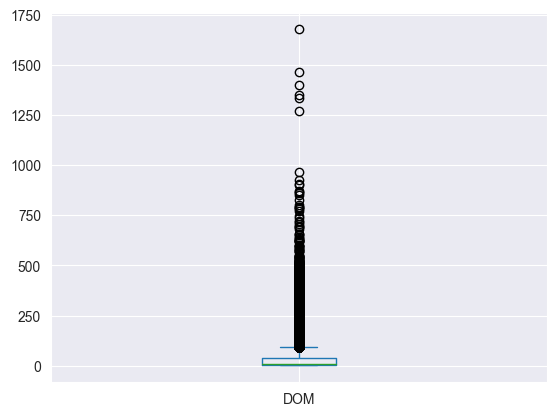

In [12]:
# Analyzing DOM column box plot
housing_dropped.DOM.plot(kind = "box");

### we have so many outliers, so we should use mode of DOM column to fill the missing values

In [13]:
# creating a copy of our dataframe
housing_no_missing = housing_dropped.copy()

In [14]:
# filling DOM missing values with its mode.
mode_value = housing_dropped["DOM"].mode()[0]
housing_no_missing["DOM"] = housing_no_missing["DOM"].fillna(mode_value)

In [15]:
mode_value

1.0

### removing rows which have missing values in elevator or subway column

In [16]:
housing_no_missing.dropna(subset=["elevator", "subway"], inplace=True)

In [17]:
housing_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318819 entries, 0 to 318850
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   tradeTime            318819 non-null  object 
 3   DOM                  318819 non-null  float64
 4   totalPrice           318819 non-null  float64
 5   square               318819 non-null  float64
 6   livingRoom           318819 non-null  object 
 7   drawingRoom          318819 non-null  object 
 8   kitchen              318819 non-null  int64  
 9   bathRoom             318819 non-null  object 
 10  floor                318819 non-null  object 
 11  constructionTime     318819 non-null  object 
 12  renovationCondition  318819 non-null  int64  
 13  buildingStructure    318819 non-null  int64  
 14  ladderRatio          318819 non-null  float64
 15  elevator             3

# Changing categorical columns from given number to string value
### NEW VALUES:
<center>
<table>
<tr>
    <td><b><code>elevator</code></b></td>
</tr>
<tr>
<td>1</td> <td>'has elevator'</td>
</tr>
<tr>
<td>0</td> <td>'no elevator'</td>
</tr>
</table>

<br>

<table>
<tr>
    <td><b><code>subway</code></b></td>
</tr>
<tr>
<td>1</td> <td>'has subway'</td>
</tr>
<tr>
<td>0</td> <td>'no subway'</td>
</tr>
</table>
<br>


<table>
<tr>
<td><b><code>buildingStructure</code></b></td>
</tr>
<tr>
<td>1</td> <td>'unknown'</td>
</tr>
<tr>
<td>2</td> <td>'mixed'</td>
</tr>

<tr>
<td>3</td> <td>'brick and wood' </td>
</tr>

<tr>
<td>4</td> <td>'concrete'</td>
</tr>

<tr>
<td>5</td> <td>'steel'</td>
</tr>

<tr>
<td>6</td> <td>'steel-concrete composite'</td>
</tr>
</table>
<br>


<table>
<tr>
<td><b><code>renovationCondition</code></b></td>
</tr>
<tr>
<td>1</td> <td>'other'</td>
</tr>
<tr>
<td>2</td> <td>'rough'</td>
</tr>

<tr>
<td>3</td> <td>'Simplicity' </td>
</tr>

<tr>
<td>4</td> <td>'hardcover'</td>
</tr>

</table>

</center>

In [18]:
# Creating a copy of current housing dataframe
housing_categorical = housing_no_missing.copy()

# elevator and subway types are float we change them to int first.
housing_categorical[["elevator", "subway"]] = housing_categorical[["elevator", "subway"]].astype(int)
# Changing type of selected columns to string (object)
housing_categorical[["elevator", "subway", "buildingStructure", "renovationCondition"]] = housing_categorical[["elevator", "subway", "buildingStructure", "renovationCondition"]].astype(str)
# Replace numeric values to string values.
housing_categorical["elevator"] = housing_categorical["elevator"].replace({'1': 'has elevator', '0': 'no elevator'})
housing_categorical["subway"] = housing_categorical["subway"].replace({'1': 'has subway', '0': 'no subway'})
housing_categorical["buildingStructure"] = housing_categorical["buildingStructure"].replace({'1': 'unknown', '2': 'mixed', '3': 'brick and wood', '4': 'concrete', '5': 'steel', '6': 'steel-concrete composite'})
housing_categorical["renovationCondition"] = housing_categorical["renovationCondition"].replace({'1': 'other', '2': 'rough', '3': 'Simplicity', '4': 'hardcover'})

In [19]:
housing_categorical[["elevator", "subway", "buildingStructure", "renovationCondition"]].head()

,elevator,subway,buildingStructure,renovationCondition
0,has elevator,has subway,steel-concrete composite,Simplicity
1,has elevator,no subway,steel-concrete composite,hardcover
2,has elevator,no subway,steel-concrete composite,Simplicity
3,has elevator,no subway,steel-concrete composite,other
4,no elevator,has subway,mixed,rough


# Some columns have numeric values but their type is 'object' we should replace them with numeric values

In [20]:
housing_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318819 entries, 0 to 318850
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   tradeTime            318819 non-null  object 
 3   DOM                  318819 non-null  float64
 4   totalPrice           318819 non-null  float64
 5   square               318819 non-null  float64
 6   livingRoom           318819 non-null  object 
 7   drawingRoom          318819 non-null  object 
 8   kitchen              318819 non-null  int64  
 9   bathRoom             318819 non-null  object 
 10  floor                318819 non-null  object 
 11  constructionTime     318819 non-null  object 
 12  renovationCondition  318819 non-null  object 
 13  buildingStructure    318819 non-null  object 
 14  ladderRatio          318819 non-null  float64
 15  elevator             3

### Some unique values in these columns:

In [21]:
print('constructionTime : ',housing_categorical.constructionTime.unique())
print('floor : ',housing_categorical.floor.unique())

constructionTime :  ['2005' '2004' '2008' '1960' '1997' '2009' '2006' '1991' '2001' '1990'
 '2011' '2000' '1998' '2010' '1996' '1993' '2002' '未知' '2012' '1989'
 '2003' '2007' '1994' '1984' '1992' '2014' '1985' '2013' '1999' '1979'
 '1981' '1976' '1982' '1975' '1983' '1986' '1995' '1965' '1988' '1987'
 '2015' '1955' '1980' '1978' '1958' '1970' '1956' '1977' '1964' '1963'
 '1967' '2016' '1974' '1973' '1959' '1954' '1962' '1966' '1957' '1944'
 '1972' '1971' '1953' '1968' '1961' '1950' '1952' '1933' '1969' '1906'
 '1934' '1914']
floor :  ['高 26' '高 22' '中 4' '底 21' '中 6' '中 8' '高 6' '高 10' '中 23' '底 11' '底 3'
 '高 24' '低 23' '中 19' '高 18' '低 25' '中 12' '中 14' '中 30' '中 27' '中 5'
 '低 18' '底 28' '中 11' '低 9' '顶 7' '顶 27' '低 6' '中 17' '顶 6' '中 24' '中 15'
 '底 5' '中 29' '顶 19' '顶 5' '中 9' '低 22' '顶 18' '低 16' '高 13' '高 9' '高 17'
 '底 6' '中 28' '低 26' '底 15' '高 16' '底 2' '低 7' '中 13' '低 33' '底 14' '高 15'
 '底 4' '顶 11' '中 32' '顶 16' '底 18' '顶 17' '低 14' '低 10' '底 20' '高 12'
 '低 31' '低 30' '低 19' '低

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
some of values in <code>constructionTime</code> column are china characters which means <code>Unknown</code> we can replace them with mean or mode but for this case we remove houses which have unknown <code>constructionTime</code>
</font>
</p>

In [22]:
housing_construction = housing_categorical.copy()

# Delete rows which have character value in this column.
housing_construction = housing_construction[housing_construction["constructionTime"].str.isdigit()]
# Change type of this column to integer.
housing_construction["constructionTime"] = housing_construction["constructionTime"].astype(int)

In [23]:
housing_construction.constructionTime.dtype

dtype('int32')

In [24]:
print(housing_construction.constructionTime.unique())

[2005 2004 2008 1960 1997 2009 2006 1991 2001 1990 2011 2000 1998 2010
 1996 1993 2002 2012 1989 2003 2007 1994 1984 1992 2014 1985 2013 1999
 1979 1981 1976 1982 1975 1983 1986 1995 1965 1988 1987 2015 1955 1980
 1978 1958 1970 1956 1977 1964 1963 1967 2016 1974 1973 1959 1954 1962
 1966 1957 1944 1972 1971 1953 1968 1961 1950 1952 1933 1969 1906 1934
 1914]


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
<code>floor</code> value includes a word and number next to it and the number shows the height of the house we have to remove the word before number and only keep number
</font>
</p>

In [25]:
housing_floor = housing_construction.copy()

# Remove the word before number using regex.
housing_floor["floor"] = housing_floor["floor"].str.extract(r'(\d+)')
# Change its dtype to int
housing_floor["floor"] = housing_floor["floor"].astype(int)

In [26]:
print(housing_floor.floor.unique())

[26 22  4 21  6  8 10 23 11  3 24 19 18 25 12 14 30 27  5 28  9  7 17 15
 29 16 13  2 33 20 31 32  1 34 42 37 36 35 63 57]


In [27]:
housing_floor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299536 entries, 0 to 318849
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  299536 non-null  float64
 1   Lat                  299536 non-null  float64
 2   tradeTime            299536 non-null  object 
 3   DOM                  299536 non-null  float64
 4   totalPrice           299536 non-null  float64
 5   square               299536 non-null  float64
 6   livingRoom           299536 non-null  object 
 7   drawingRoom          299536 non-null  object 
 8   kitchen              299536 non-null  int64  
 9   bathRoom             299536 non-null  object 
 10  floor                299536 non-null  int32  
 11  constructionTime     299536 non-null  int32  
 12  renovationCondition  299536 non-null  object 
 13  buildingStructure    299536 non-null  object 
 14  ladderRatio          299536 non-null  float64
 15  elevator             2

In [28]:
housing_floor.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,4,2005,Simplicity,steel-concrete composite,0.500,has elevator,no subway,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1


# Price box plot

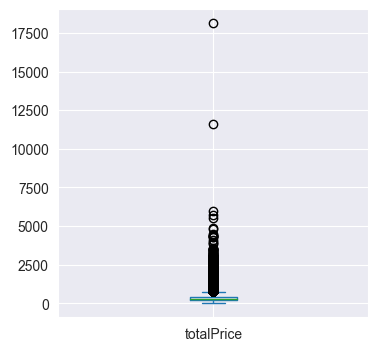

In [33]:
housing_floor["totalPrice"].plot(kind = "box", figsize=(4,4));

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=4>
we have outliers in <code>totalprice</code> column we have to remove them from dataset.
</font>
</p>

In [39]:
# Calculates outliers and IQR (including a factor of 1.5) for given column.
def outliers(column : pd.Series) -> tuple[float, float, float]:
    Q1: float = column.quantile(.25)
    Q3: float = column.quantile(.75)
    IQR: float = Q3 - Q1
    return Q1, Q3, IQR * 1.5

housing_no_outliers = housing_floor.copy()
# calculate outliers
res = outliers(housing_no_outliers["totalPrice"])
# remove outliers
housing_no_outliers = housing_no_outliers[(housing_no_outliers["totalPrice"] >= res[0] - res[2]) & (housing_no_outliers["totalPrice"] <= res[1] + res[2])]

print('Number of removed outliers : ', housing_floor.shape[0] - housing_no_outliers.shape[0])

Number of removed outliers :  14496


# box plot

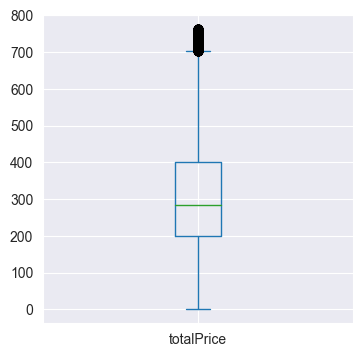

In [42]:
housing_no_outliers.totalPrice.plot(kind = "box", figsize=(4,4));

### Creating new CSV file with clean data.

In [ ]:
housing_no_outliers.to_csv('housing_no_outliers.csv', encoding='gbk', index=False)

# Read new CSV file using pandas

In [7]:
housing_no_outlier = pd.read_csv("housing_no_outliers.csv", encoding='gbk')

In [8]:
housing_no_outlier.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7


<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="green">
New feature (The distance of house to center of the Chinese capital)
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=4>
We want to calculate the distance of each house to the center of the Chinese capital.
The <code>longitude</code> of the center of the capital is 116.4074 and the <code>latitude</code> of the center of the capital is 39.9042.
Our new dataframe is <code>housing_capital</code> and new column is <code>distanceToCapital</code>.
<br>
</font>
</p>

## The formula:
$$ distance = acos(sinφ_1*sinφ_2 + cosφ_1*cosφ_2 * cos(λ_2-λ_1)) * 6371.0088 $$
$$ φ: \text{latitude} $$
$$ λ: \text{longitude} $$
Where the angles are radians.

In [25]:
capital_Lng = radians(116.4074)
capital_Lat = radians(39.9042)
housing_capital = housing_no_outlier.copy()

#Calculating distance using the formula
lat_sin = housing_capital['Lat'].apply(lambda x: np.sin(radians(x))) * np.sin(capital_Lat)
lat_cos = housing_capital['Lat'].apply(lambda x: np.cos(radians(x))) * np.cos(capital_Lat)
lng_cos = housing_capital["Lng"].apply(lambda x: np.cos(capital_Lng - radians(x)))
housing_capital["distanceToCapital"] = np.arccos(lat_sin + lat_cos * lng_cos) * 6371.0088

housing_capital["distanceToCapital"].head()

0    14.074996
1     4.701224
2    19.293041
3     2.683335
4    10.914652
Name: distanceToCapital, dtype: float64

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="green">
New feature (Calculate and save the price per square meter of the house)
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=4>
Calculating the price per square meter of the each house and saving result in <code>pricePerSquare</code> column
<br>
</font>
</p>

In [43]:
housing_PPS = housing_capital.copy()
# The total price is based on million yuan, so we need to multiply the amount by 1000.
housing_PPS["pricePerSquare"] = housing_PPS["totalPrice"] / housing_PPS["square"] * 1000

In [44]:
housing_PPS.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996,3167.938931
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224,4343.556428
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041,2220.149254
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335,4839.506173
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652,5200.000000


## histogram plot of each numeric column.

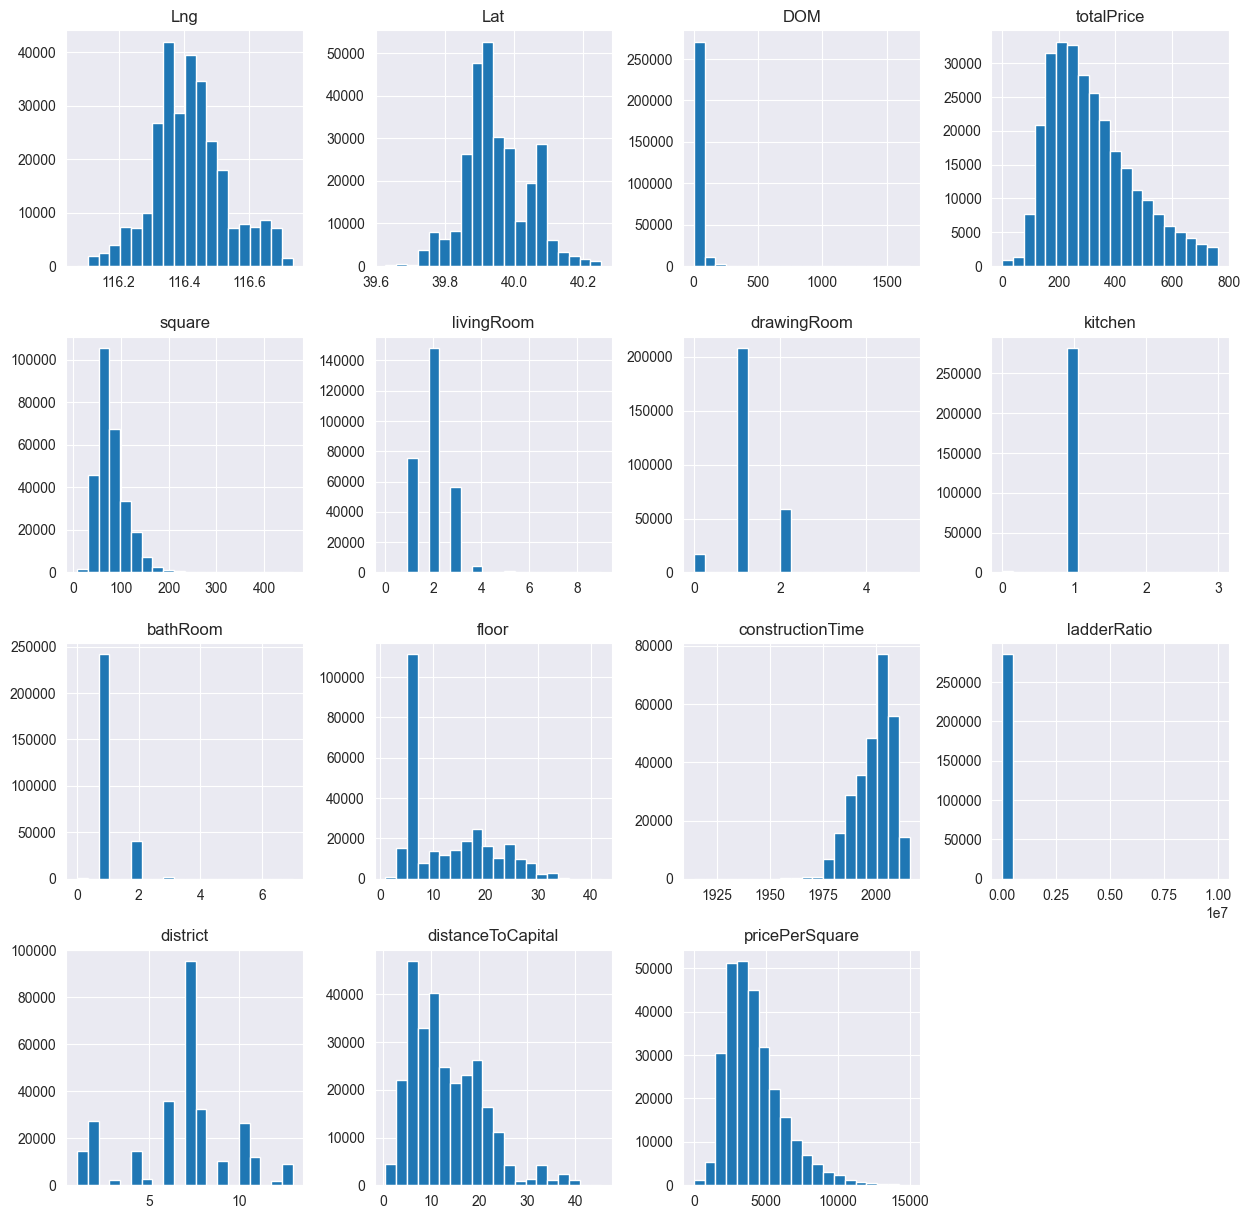

In [45]:
# Suppress the specified warning type for better display.
warnings.filterwarnings("ignore", message="To output multiple subplots, the figure containing the passed axes is being cleared.")

fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
housing_PPS.hist(ax = ax, bins = 20)

# Reset the warning filters to their default state
warnings.resetwarnings()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
According to the chart above, the price of the house has a curve towards the price of 200 million yuan. Most of the houses were built around 2000. The longest distance from the center of the capital is 40 km. Most houses have two hall rooms.
</font>
</p>

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="green">
Investigating the effect of the distance from the center on the price of each square meter
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=4>
Using seaborn's <code>regplot</code> plot
</font>
</p>

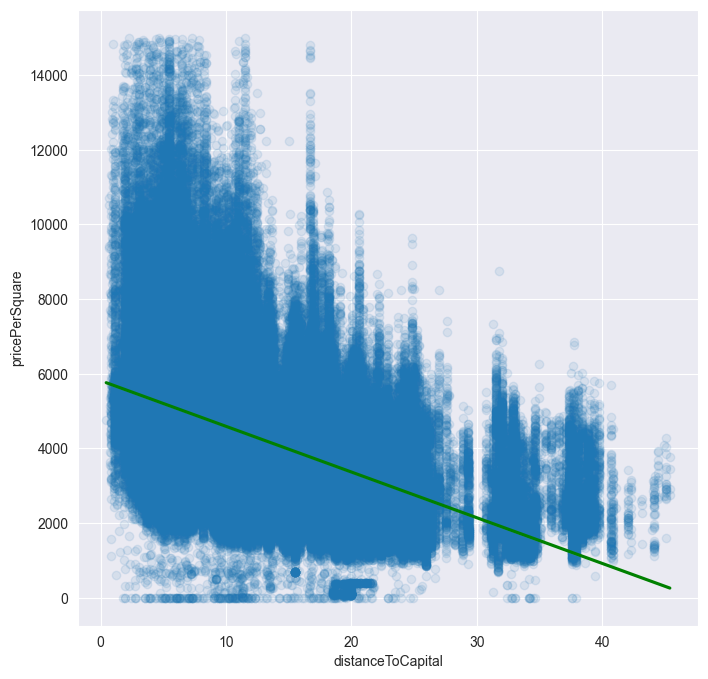

In [47]:
fig , ax = plt.subplots()
fig.set_size_inches(8,8)

sns.regplot(ax = ax, data = housing_PPS, x = 'distanceToCapital', y = 'pricePerSquare',
            line_kws={'color':'green'}, scatter_kws= {'alpha': 0.1});

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
In this section, we want to check how much having an elevator affects the price per square meter of houses.
</font>
</p>

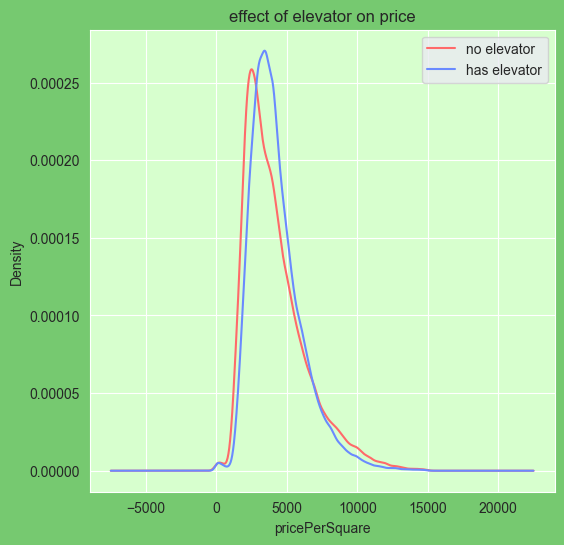

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
ax.set_title("effect of elevator on price")
housing_PPS[housing_PPS["elevator"] == "no elevator"]["pricePerSquare"].plot(kind="kde", ax=ax, label="no elevator", color="#FF6A6A")
housing_PPS[housing_PPS["elevator"] == "has elevator"]["pricePerSquare"].plot(kind="kde", ax=ax, label="has elevator", color="#6A8AFF")
ax.set_xlabel("pricePerSquare")
ax.set_facecolor("#D7FFCE")
fig.set_facecolor("#76C970")
ax.legend()

In [62]:
# Writing new dataset to new CSV file
housing_PPS.to_csv('housing_extended.csv', encoding='gbk', index=False)

# Read new CSV file using pandas

In [3]:
housing_extended = pd.read_csv("housing_extended.csv", encoding="gbk")
housing_extended.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996,3167.938931
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224,4343.556428
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041,2220.149254
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335,4839.506173
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652,5200.000000


<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="green">
Show houses in map using scatter plot
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
We use 1% of data, It is to prevent notebook and output files from becoming heavy.
</font>
</p>

In [4]:
housing_sample = housing_extended.iloc[:-100:100]
housing_sample.shape

(2850, 20)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
We can create plot for houses since we have <code>Longitude</code> and <code>latitude</code> for each house.
</font>
</p>

Text(0.5, 1.0, 'scatter plot')

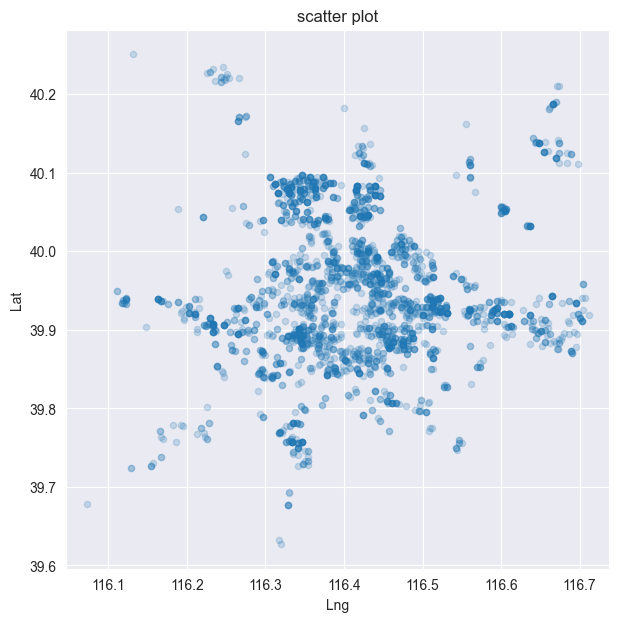

In [22]:
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(7,7)

housing_sample.plot(x='Lng', y='Lat', ax=ax1, kind='scatter', alpha=0.2)
# x-axis and y-axis should have same scale.
ax1.axis('equal')
ax1.set_title('scatter plot')

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
We are going to determine the color of the points from the color mapping function to the color for that point on the map. We use the <b>district</b> to determine the color of the points and <code>color map</code> is <b>nipy_spectral</b>.
</font>
</p>

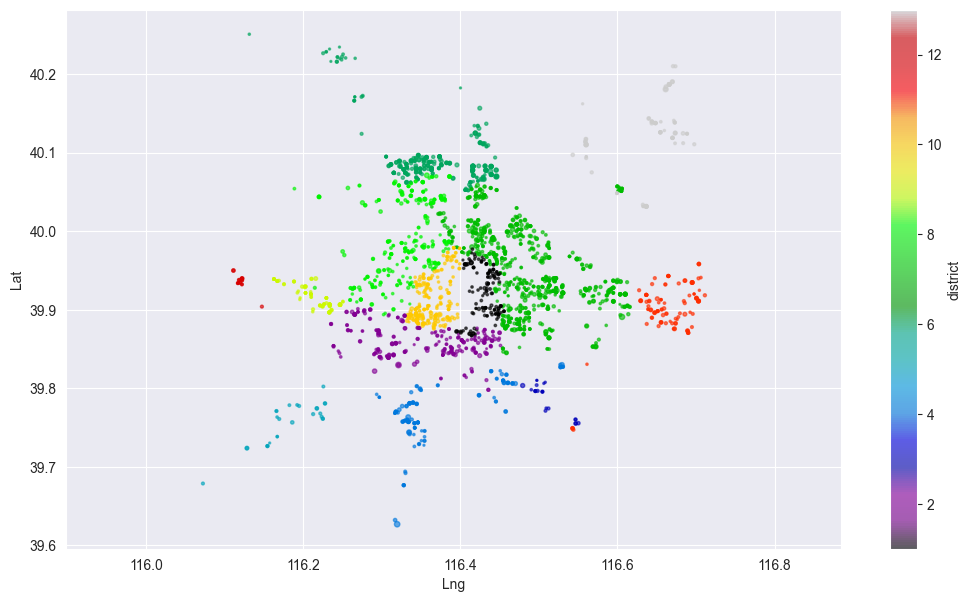

In [24]:
fig, axes = plt.subplots()
fig.set_size_inches(12.5, 7)
housing_sample.plot(x="Lng", y="Lat", kind="scatter", s=housing_sample["square"]/20,
                    c="district", cmap=plt.get_cmap("nipy_spectral"), colorbar=True,
                    alpha=0.6, ax=axes)
axes.axis("equal")

## Add background map

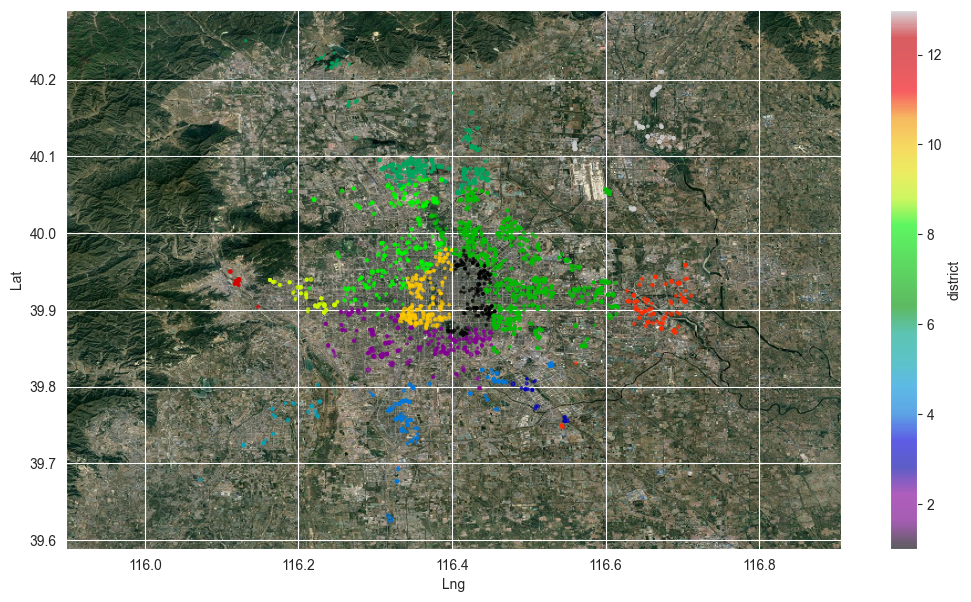

In [40]:
beijing_img = mpimg.imread("map.jpg")
x_lim = axes.get_xlim()
y_lim = axes.get_ylim()
extent = list(x_lim + y_lim)
axes.imshow(beijing_img, extent=extent)
fig